In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
#データの読み込み
data_train = pd.read_csv('Titanic train.csv')
data_train.head()
data_train.describe()
#Pclass, Age, SibSp, Parch, Fareが数量のデータとして扱える。（PassengerId）は無視
#Ticket, Sex, Cabin, Embarkedはカテゴリーデータになる。(Name)は無視


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data_train.shape#(891, 12)
data_train.isnull().sum()#Cabin, Age, Embarkedに欠損値がある。Cabinの欠損値が非常に多い
#kaggle公式サイトからwomen, children, upper-classを優先的に助けたという情報がある

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(577, 12)
(314, 12)
(109, 12)
(233, 12)


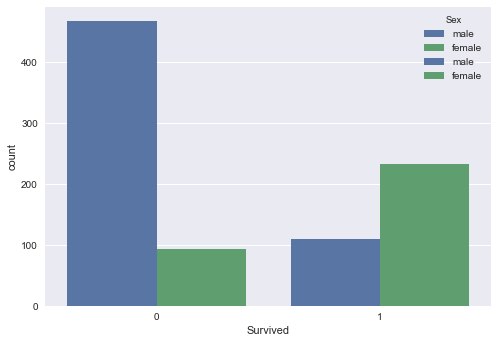

In [5]:
import seaborn as sns
#女性と男性の比較から始める。
a = data_train[data_train.Sex == 'male']
b = data_train[data_train.Sex == 'female']
print(a.shape)#577人の男性が乗船していた
print(b.shape)#314人の女性が乗船していた
c = a[a.Survived == 1]
d = b[b.Survived == 1]
print(c.shape)#109人の男性が助かった。109/577(19%)
print(d.shape)#233人の女性が助かった。233/314(74%)
#助かった人数は342/891 = 38%
sns.countplot('Pclass', data = data_train, hue = 'Sex')#1では男性が女性の2倍くらいいる
aaaa = data_train.loc[:,['Sex', 'Age', 'Pclass']]
sns.countplot('Survived', data = data_train, hue = 'Sex')

In [20]:
data_train.describe()
e = data_train[data_train.Age <= 5]
print(e.shape)#139人の18歳以下の子がいた
f = e[e.Survived == 1]
print(f.shape)#70人の18歳以下の子が助かった
#年はいろいろと変えてみる
#18(70/139 = 50%), 17(61/113 = 53%), 16(55/100 = 55%), 15(49/83 = 59%)
#14(45/77 = 58%), 13(42/71 = 59%), #大体このくらいが限界である。
#38%
31/44

(44, 12)
(31, 12)


0.7045454545454546

In [21]:
g = data_train[data_train.Pclass == 1]
print(g.shape)#216人
h = g[g.Survived == 1]
print(h.shape)#136人　136/216 = 63%
i = data_train[data_train.Pclass == 2]
print(i.shape)#184人
j = i[i.Survived == 1]
print(j.shape)#87人　87/184 = 47%
k = data_train[data_train.Pclass == 3]
print(k.shape)#491人
l = k[k.Survived == 1]
print(l.shape)#119人　119/491 = 24%
119/491

(216, 12)
(136, 12)
(184, 12)
(87, 12)
(491, 12)
(119, 12)


0.24236252545824846

In [22]:
m = g[g.Sex == 'female']
print(m.shape)#94人
n = m[m.Survived == 1]
print(n.shape)#91人 (91/94 = 97%)
#342人が助かっている

(94, 12)
(91, 12)


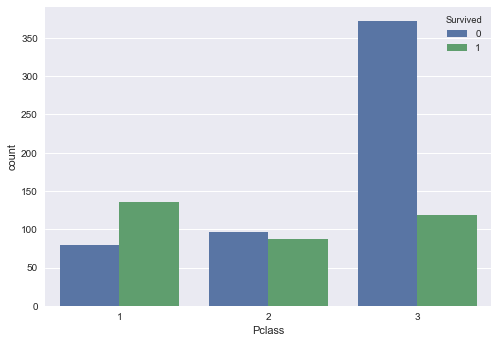

In [23]:
sns.countplot('Pclass', data = data_train, hue = 'Survived')

In [24]:
#確認
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
#Pclass, Sex, Ageを変数としてとる
ddd = pd.DataFrame(data_train, columns = ['Pclass', 'Sex', 'Age','Survived'])
ddd
#性別をダミー変数で作成
eee = pd.get_dummies(data_train['Sex'])
eee
#PclassとAgeは数値で表されるのでそのまま
fff = pd.DataFrame(data_train, columns = ['Pclass', 'Age'])
fff
#Pclass, Age, SexのDataFrameに直す
ggg = pd.concat([fff, eee], axis = 1)
#平均値で補完する
ggg = ggg.fillna(ggg.mean())
#目的変数'Survived'のDataFrameを作成
hhh = pd.DataFrame(data_train, columns = ['Survived'])
hhh
#DataFrameをつなげる
iii = pd.concat([ggg, hhh], axis = 1)
#np.array型に変換
jjj = np.array(ggg)
kkk = np.array(hhh)
#確認
iii.head()
jjj.shape
kkk.shape

(891, 1)

In [26]:
#ホールドアウト法
from sklearn.model_selection import train_test_split
jjj_train, jjj_test, kkk_train, kkk_test = train_test_split(jjj, kkk, test_size = 0.3, random_state = 0)

In [27]:
#決定木を用いる
from sklearn.tree import DecisionTreeClassifier
tree_1 = DecisionTreeClassifier(random_state = 0)
tree_1.fit(jjj_train, kkk_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [28]:
#評価
tree_1.score(jjj_train, kkk_train)
tree_1.score(jjj_test, kkk_test)
#あまり高くない

0.7574626865671642

In [29]:
#ランダムフォレストを用いる
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 0, n_estimators = 100)
rfc.fit(jjj_train, kkk_train)

C:\Users\daisu\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [30]:
#結果を出力
print('train: %.4f' % rfc.score(jjj_train, kkk_train))
print('test : %.4f' % rfc.score(jjj_test, kkk_test))
#過学習を起こしている

train: 0.8941
test : 0.7649


In [31]:
#勾配ブースティング木を用いる
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = 0, max_depth = 2, learning_rate = 0.1)
gbc.fit(jjj_train, kkk_train)

C:\Users\daisu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=2,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

In [32]:
#結果を出力
print('train: %.4f' % gbc.score(jjj_train, kkk_train))
print('test : %.4f' % gbc.score(jjj_test, kkk_test))
#8割以上の結果が得られた
#過学習も起こしていない

train: 0.8250
test : 0.8134
